NAMA : IBNU GILANG PRADUTA CIPTA

NIM  : 2209106040

KELAS: A22

In [14]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import splitfolders 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


IMPORT LIBRARY DULU

In [15]:
base_dir = 'Lemon'

DEKLARASI TEMPAT SIMPAN IMAGE

In [16]:
splitfolders.ratio(base_dir,
                    output="dataset_final",
                   seed=1337,
                   ratio=(.8,.1,.1))

Copying files: 511 files [00:07, 64.21 files/s]


In [17]:
train_img_path = r'C:\Users\User\Documents\pt kb\pt7\dataset_final\test'
test_img_path = r'C:\Users\User\Documents\pt kb\pt7\dataset_final\train'
validation_img_path = r'C:\Users\User\Documents\pt kb\pt7\dataset_final\val'
class_names = os.listdir(train_img_path)

BAGI DATSET BUAT TRAIN,TEST,VALIDASI

In [18]:
# ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest'
)

In [19]:
# Train Generator
train_generator = train_datagen.flow_from_directory(
    train_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary' # jika hanya ada 2 Kelas memakai binary (Matang |Ripe| dan Unripe |Tidak Matang|
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    validation_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Test Generator
test_generator = train_datagen.flow_from_directory(
    test_img_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
)

Found 53 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


READ DATASET DAN KITA LAKUKAN SPLIT DATASET

In [20]:
class_names

['ripe lemon', 'unripe lemon']

MENAMPILKAN KELAS DATASET

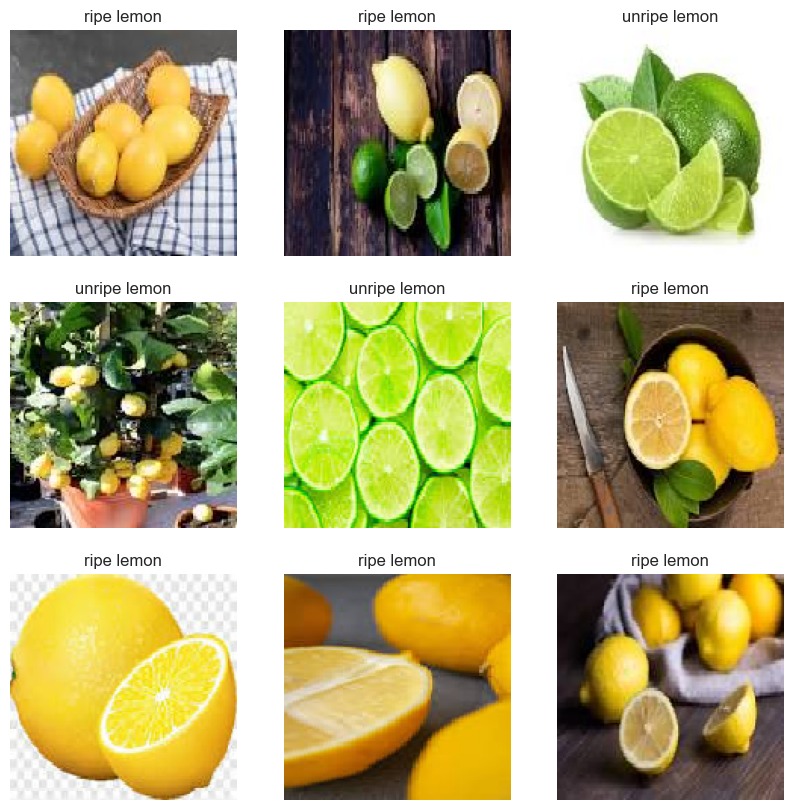

In [21]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
    break
plt.show()

MENAMPILKAN 9 GAMBAR

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

BUAT ARSITEKTUR DENGAN METODE CNN

In [24]:
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.optimizers.Adam(),
    metrics=['accuracy'],
)

COMPILE MODEL

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 1.8663 - accuracy: 0.4340 - val_loss: 0.8217 - val_accuracy: 0.5200
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 0.7656 - accuracy: 0.5283 - val_loss: 0.7588 - val_accuracy: 0.5200
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 0.7047 - accuracy: 0.5283 - val_loss: 0.6888 - val_accuracy: 0.5200
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.6694 - accuracy: 0.5849 - val_loss: 0.6803 - val_accuracy: 0.5200
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.6477 - accuracy: 0.5283 - val_loss: 0.6329 - val_accuracy: 0.6800
Epoch 6/100
2/2 [==============================] - 2s 959ms/step - loss: 0.6030 - accuracy: 0.6981 - val_loss: 0.6513 - val_accuracy: 0.5400
Epoch 7/100
2/2 [==============================] - 2s 962ms/step - loss: 0.5423 - accuracy: 0.6981 - val_loss: 0.5825 - val_accuracy: 0.7000
Epoch 8/100
2/2 [===========

TRAIN MODEL

In [26]:
model.evaluate(test_generator)

13/13 [==============================] - 4s 280ms/step - loss: 0.5872 - accuracy: 0.7353


[0.5871939659118652, 0.7352941036224365]

EVAL MODEL

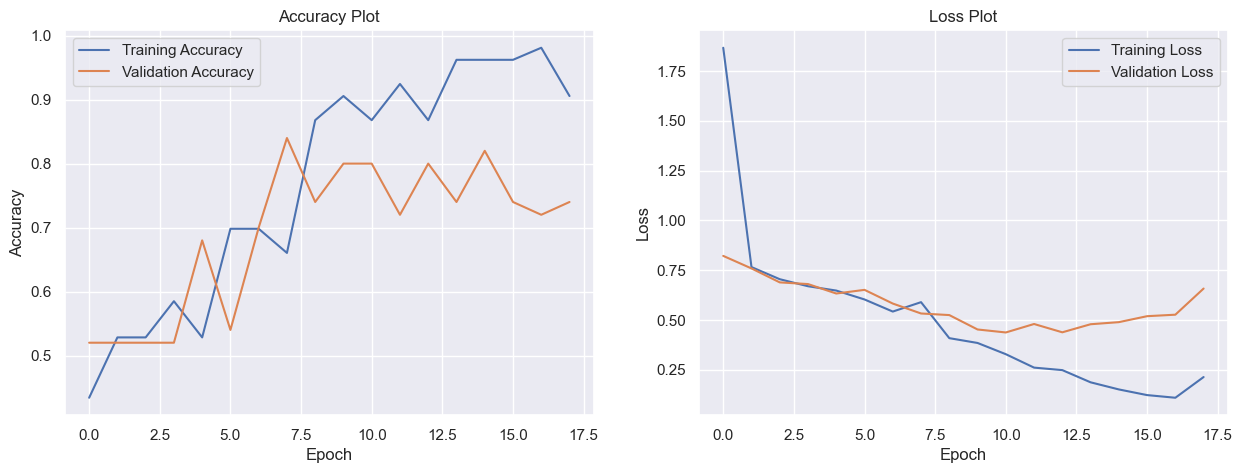

In [27]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
from PIL import Image
import numpy as np
from skimage import transform

IMPORT LIBRARY

In [32]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'C:\Users\User\Documents\pt kb\pt7\lemon\unripe lemon\2.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 174ms/step


TES MODEL MEMPREDIKSI KELAS GAMBAR YANG DIBERIKAN

In [33]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Unripe']], dtype='<U6')

MENAMPILKAN HASIL

In [34]:
def load (filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image)
    np_image = transform.resize(np_image, (150,150,3))
    np_image = np.expand_dims(np_image, axis=0)
    return np_image

image = load(r'C:\Users\User\Documents\pt kb\pt7\lemon\ripe lemon\1.jpg')
img_pred = model.predict(image)

1/1 [==============================] - 0s 59ms/step


TES MODEL MEMPREDIKSI KELAS GAMBAR YANG DIBERIKAN

In [35]:
pred = np.where(img_pred > 0.5,"Unripe","Ripe")
pred

array([['Ripe']], dtype='<U6')

BUAT ARSITEKTUR DENGAN METODE CNN